# BMEB W4020 Computational Neuroscience: Circuits in the Brain
## Python Source Code for Figures in Lecture 3: Memristors

+ **Translated from original Matlab code by Nanyan Zhu <nz2305@columbia.edu>**

In this notebook, we provide the source code for all the figures appearing in the Lecture 3 of BMEB W4020, Circuits in Brain. We start by exploring the HP-memristor for both soft-switching and hard-switching cases, and visualize the simulation result in 6 diagrams, time versus current and voltage, time versus internal state and mem-resistance, voltage versus current, current versus mem-resistance, flux versus charge, and charge versus mem-resistance.

The purpose of this demo is to help readers understand the material covered in the lecture better and get more intuition by running the code. Readers are encouraged to modify the code to generate more interesting phenomena. 


This file is based on the code written by Prof. Aurel A. Lazar and Wenze Li.

**Author:** Chung-Heng Yeh <chyeh@ee.columbia.edu>, Mehmet Kerem <mkt2126@columbia.edu>, Tingkai Liu <tl2747@columbia.edu>

**Copyright 2012-2018** Aurel A. Lazar, Chung-Heng Yeh, Mehmet Kerem and Tingkai Liu

In [1]:
import numpy as np
display_mode = 'Plot'
import warnings; warnings.simplefilter('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import lecture3 as le

## HP-Memristor

The memristor is characterized by a relation between the charge and the 
flux, defined mathematically as the time integral of the voltage, 
which need not have a magnetic flux interpretation [1]. The ideal 
hp-memristor [2] can be expressed as follows,

\begin{align}
v(t) & = M(x)i(t) \\
M(x) & = [x+(1-x)r]i(t) \\
dx/dt & = i(t) / \beta 
\end{align}

### HP-Memristor: Soft Switching
If we do not introduce any mechanism to force the internal state of the 
hp-memristor to be in $[0, 1]$, we say the hp-memristor is of soft switching. 
We demonstrate the behavior of soft switching using a sinusoidal waveform 
as the voltage input.

In [7]:
memristor = {'r':160,'beta':1e-2,'x0':1e-1}; # Create the memristor structure
dt = 1e-4
t = np.transpose(np.arange(0,6+dt/10,dt))
t = t.reshape((1,len(t)))
Omega = np.pi; 
V = np.sin(Omega * t)
I,x = le.hp_memristor(t,V,memristor,'Switch','Soft')

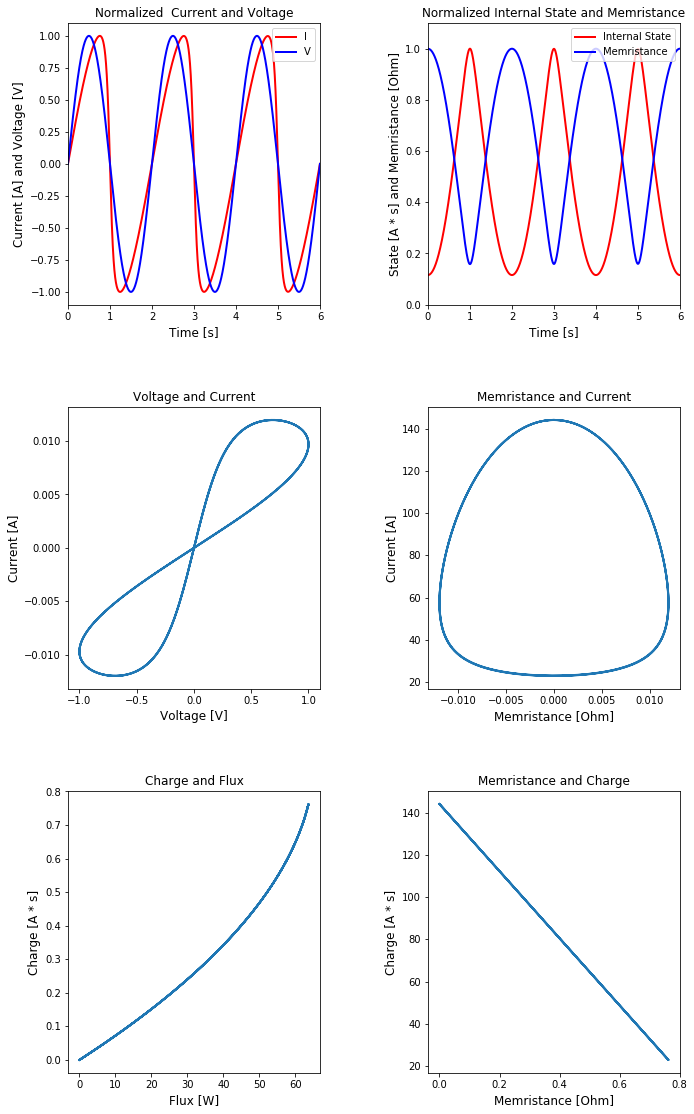

In [9]:
from matplotlib.pyplot import savefig
le.plot_memristor(t,I,V,x,display_mode)
savefig('Soft-switching memristor example 1')

Here is another example using the square of sinusoidal waveform as
the voltage input:

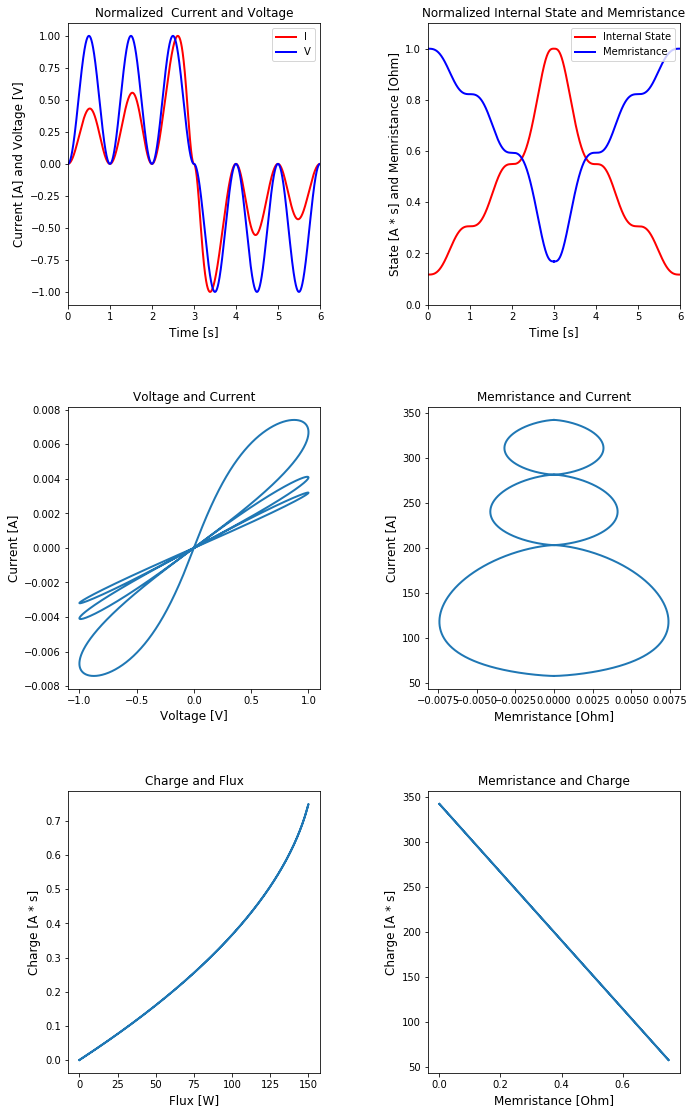

In [10]:
memristor = {'r':380,'beta':1e-2,'x0':1e-1} # Create the memristor structure
dt = 1e-4                                    # Set time step
t = np.arange(0,6+dt/10,dt)                     # Set time course
t = t.reshape((1,len(t)))
Omega = np.pi;                              # Set frequency of sin
V = np.sin(Omega * t) ** 2 * np.sign(-t+3)   # Get input voltage signal 
I,x = le.hp_memristor(t,V,memristor,'Switch','Soft'); #  Simulate the HP-memristor

# Generate animation for simulation and plot the result.
from matplotlib.pyplot import savefig
le.plot_memristor(t,I,V,x,display_mode)
savefig('Soft-switching memristor example 2')

### HP-Memristor: Hard Switching
There are many ways to restrict the internal state, x, of the hp-memristor
to be $\in [0, 1]$. One of them is modifying the differential equation of x 
to the following one,
$$dx/dt = x(1-x)i(t) / \beta$$

We demonstrate the behavior of hard switching using a sinusoidal waveform 
as the voltage input.

In [12]:
memristor = {'r':50,'beta':1e-2,'x0':1e-2} # Create the memristor structure
dt = 1e-4                                    # Set time step
t = np.arange(0,16+dt/10,dt)                     # Set time course
t = t.reshape((1,len(t)))
Omega = 2 * np.pi * 0.125;                              # Set frequency of sin
V = np.sin(Omega * t)                   # Get input voltage signal 
I,x = le.hp_memristor(t,V,memristor); #  Simulate the HP-memristor

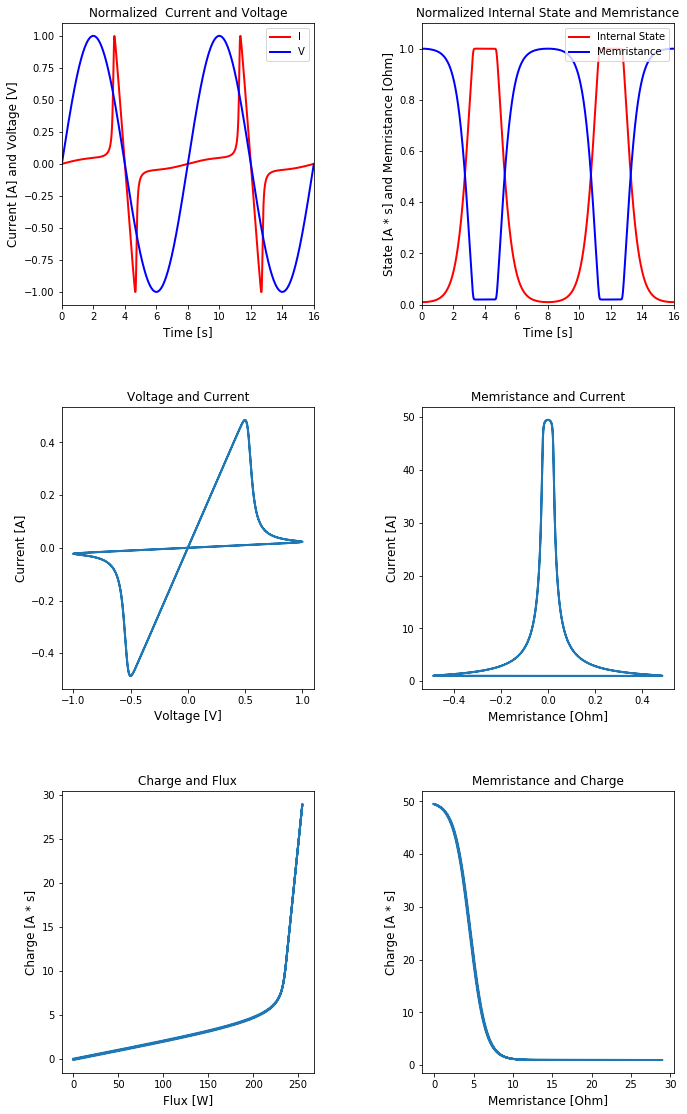

In [13]:
# Generate animation for simulation and plot the result.
from matplotlib.pyplot import savefig
le.plot_memristor(t,I,V,x,display_mode)
savefig('Hard-switching memristor example')

### HP-Memristor with multiple inputs
Here, we compare the dynamic behaviors of hp-memristor using sinusoidal
voltage input with different values of amplitute.

In [15]:
memristor = {'r':160,'beta':1e-2,'x0':1e-1} # Create the memristor structure
dt = 1e-4                                    # Set time step
t = np.arange(0,6+dt/10,dt)                     # Set time course
t = t.reshape((1,len(t)))
Omega = np.pi                              # Set frequency of sin
voltage_range = np.arange(0.6,1+0.01,0.1)    # Set voltage range
V = np.zeros([voltage_range.size, t.size])  # Initialize voltage matrix
I = np.zeros([voltage_range.size, t.size])  # Initialize current matrix
x = np.zeros([voltage_range.size, t.size])  # Initialize state matrix

for i in range(len(voltage_range)):
    V[i,:] = voltage_range[i]* np.sin(Omega*t) #  Get input voltage signal 
    I_tmp, x_tmp = le.hp_memristor(t,V[i,:],memristor,'Switch','Soft')
    I[i,:] = I_tmp
    x[i,:] = x_tmp

In [16]:
from scipy import integrate
Q = integrate.cumtrapz(I,t)
F = integrate.cumtrapz(V,t)

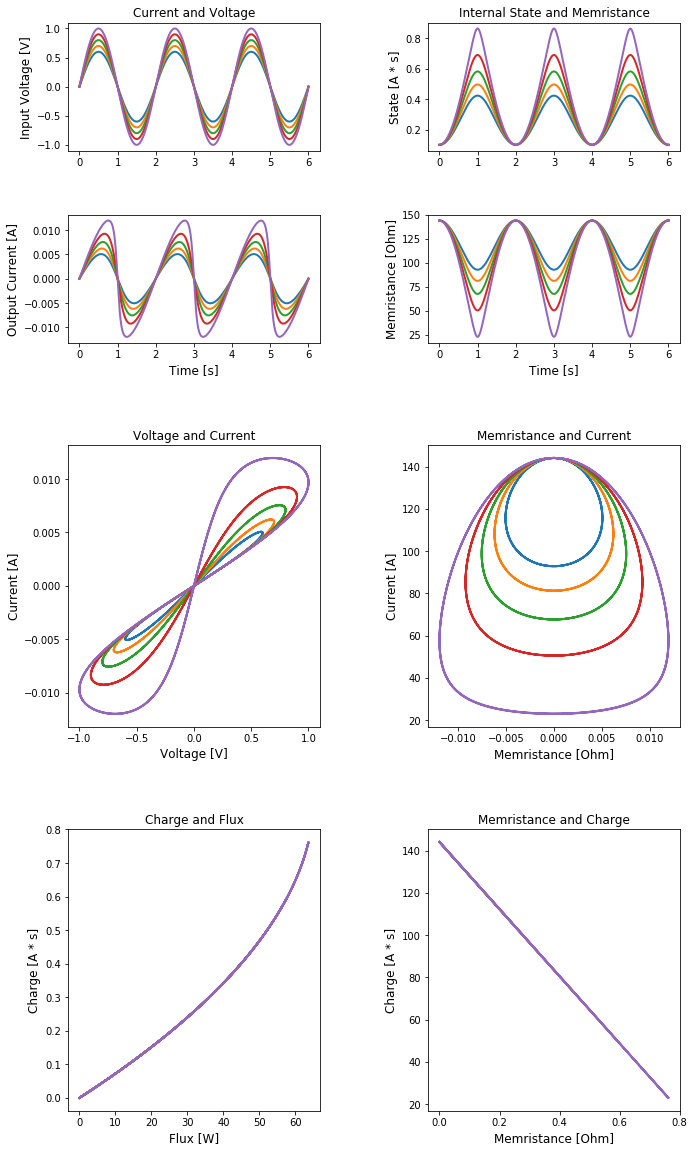

In [17]:
# Generate animation for simulation and plot the result.
from matplotlib.pyplot import savefig
le.plot_memristor(t,I,V,x,display_mode);
savefig('Multiple Sine Wave')

## Hodgkin-Huxley Characterization
### Voltage-Gated Sodium Channel Characterization

In [19]:
dt = 1e-6
t = np.arange(-0.05,0.2+dt,dt)
t = np.reshape(t,(1,len(t)))
I = np.ones(t.shape) * 9.5
v, i_all, g_all = le.hodgkin_huxley(t,I)

i_K = i_all[:,0].T
i_Na = i_all[:,1].T
g_K = g_all[:,0].T
g_Na = g_all[:,1].T

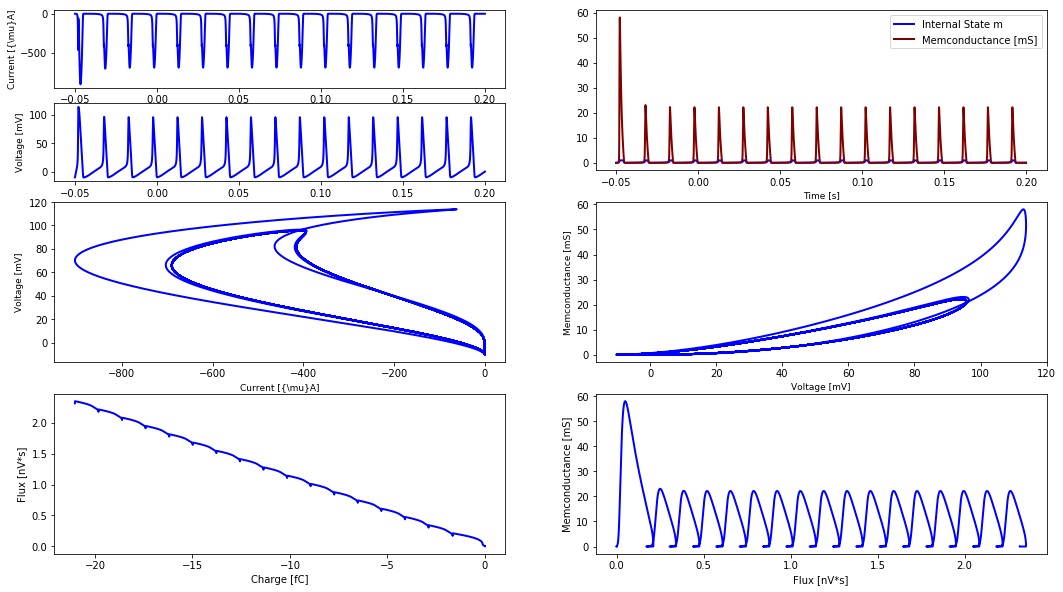

In [21]:
v, i_all, g_all, x_all = le.hhn_w_states(t,I)
le.SixPlots(t, i_all[:,1], v, x_all[:,1], g_all[:,1],'m')

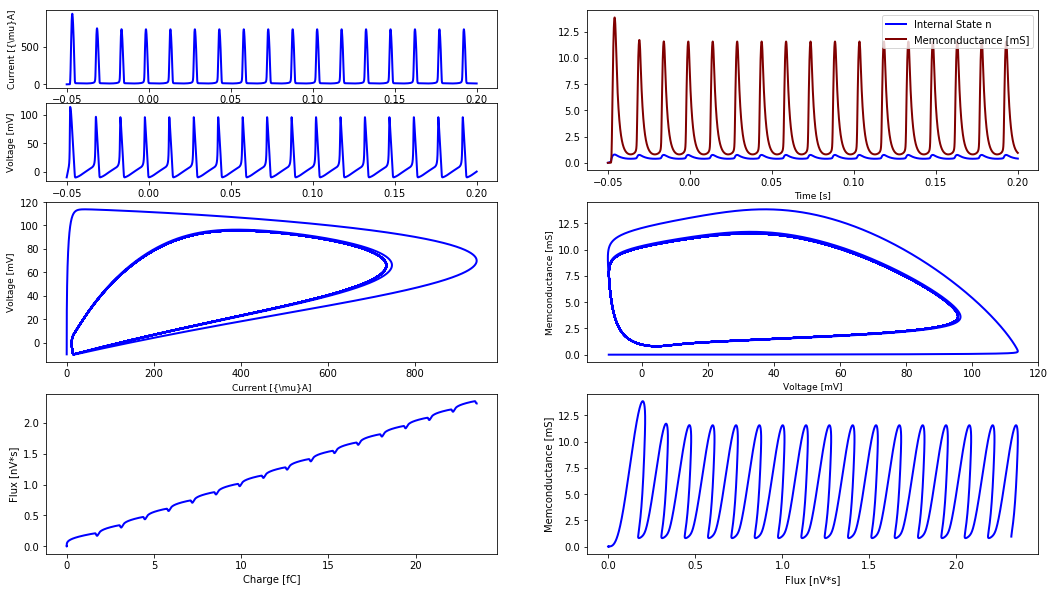

In [22]:
v, i_all, g_all, x_all = le.hhn_w_states(t,I)
le.SixPlots(t, i_all[:,0], v, x_all[:,0], g_all[:,0],'n')